# Training a neuron to compute NOT function

NOT function is also known as negation. Given a 0, it outputs 1. Given 1, it outputs 0. The following is the truth table:-

| in | out |
|-|
| 0 | 1 |
| 1 | 0 |

We will be training a single neuron to simulate this function. The neuron uses the sigmoid activation function.

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Given a weight $w$ and $b$, the neuron calculates the output:-

$$ a = \sigma(wx+b)$$

Let us start with exploring the sigmoid function.

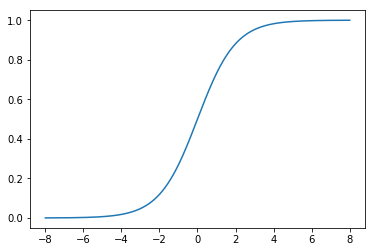

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1.0/(1+np.exp(-z))

x = np.linspace(-8, 8, 1000)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

As can be seen, the sigmoid function maps an input from a domain $(-\infty, \infty)$ to a range of $(0, 1)$. 

Let us prepare the test data for the NOT function and initialize weights.

## Initialization

In [12]:
inp = [0, 1]
outp = [1, 0]

w = np.random.randn()
b = np.random.randn()

 Let us attempt to compute the NOT function using our initial weights.

Weight: 0.0628282487983; Bias: -0.977472904133
Input = 0; Output = 0.273393502398; Expected = 1; Error = -0.726606497602
Input = 1; Output = 0.286050338162; Expected = 0; Error = 0.286050338162
Cost = 0.15244544958


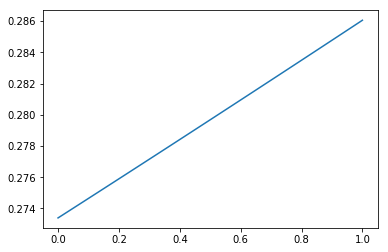

In [13]:
def print_error(w, b):
    print "Weight: {0}; Bias: {1}".format(w, b)
    
    error = 0
    
    for i in range(2):
        x = inp[i]
        e = outp[i]
        a = sigmoid(w*x + b)
    
        err = a-e
    
        print "Input = {0}; Output = {1}; Expected = {2}; Error = {3}".format(x, a, e, err)
    
        error += err**2/2
    
    error /= 2

    print "Cost = {0}".format(error)
    
    nfunc=np.vectorize(lambda x: sigmoid(w*x+b))
    plt.plot(np.linspace(0,1,100), nfunc(np.linspace(0, 1, 100)))
    plt.show()
    
print_error(w, b)

As expected, random initial values do not produce the value we need. We now use gradient descent to adjust our weights and bias.

The cost is given by:-

$$Cost, C = \frac{1}{2n}\Sigma\lVert a-e \rVert^2$$

$$\frac{dC}{da} = \frac{1}{n}\Sigma(a-e)$$

The activation is given by:-

$$a = \sigma(z)$$

$$\frac{da}{dz} = a(1-a)$$

The sum, z is given by:-

$$z = w*x+b$$

$$\frac{\partial z}{\partial w} = x$$

$$\frac{\partial z}{\partial b} = 1$$

Using the differentiation chain rule, we get the final relation:-

$$\frac{\partial C}{\partial w} = \frac{1}{n}\Sigma(a-e) * a * (1-a) * x$$

$$\frac{\partial C}{\partial b} = \frac{1}{n}\Sigma(a-e) * a * (1-a)$$

The gradients can be used to adjust the weight and bias:-

$$w \rightarrow w'-\frac{\partial C}{\partial w}$$
$$b \rightarrow b'-\frac{\partial C}{\partial b}$$

Let us use the formula to compute the gradients:-

## Gradient descent

In [14]:
def improve_parameters(w, b):
    del_w = 0
    del_b = 0
    error = 0

    for i in range(2):
        x = inp[i]
        e = outp[i]
        a = sigmoid(w*x + b)
    
        del_w += (a-e) * a * (1-a) * x
        del_b += (a-e) * a * (1-a)
        
        error += (a-e)**2/2
    
    del_w /= 2
    del_b /= 2
    error /= 2
    
    return (del_w, del_b, error)
    
del_w, del_b, error = improve_parameters(w, b)
w -= del_w
b -= del_b
print "Del_w = {0}; Del_b = {1}".format(del_w, del_b)
print "New weight = {0}; New bias = {1}".format(w,b)

Del_w = 0.0292093927037; Del_b = -0.0429606142913
New weight = 0.0336188560946; New bias = -0.934512289842


Let us compute the new errors:-

Weight: 0.0336188560946; Bias: -0.934512289842
Input = 0; Output = 0.282010166081; Expected = 1; Error = -0.717989833919
Input = 1; Output = 0.288866931074; Expected = 0; Error = 0.288866931074
Cost = 0.14973837637


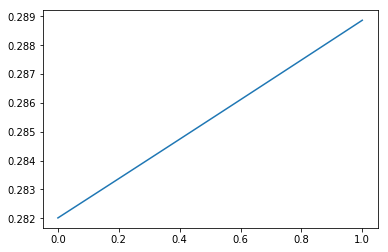

In [15]:
print_error(w, b)

As can be seen, the overall cost function is reducing. Let us try this 1000 more times.

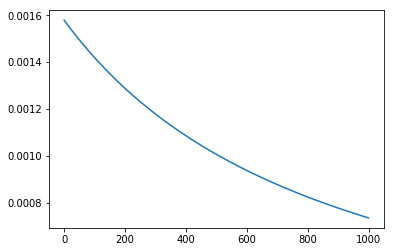

In [18]:
errors = []

for i in range(1000):
    del_w, del_b, error = improve_parameters(w,b)
    
    w -= del_w
    b -= del_b
    
    errors.append(error)
    
plt.plot(errors)
plt.show()

Let us compute the error again at this point.

Weight: -6.46676716517; Bias: 3.12527937325
Input = 0; Output = 0.957923533954; Expected = 1; Error = -0.0420764660463
Input = 1; Output = 0.0341750159704; Expected = 0; Error = 0.0341750159704
Cost = 0.000734590177882


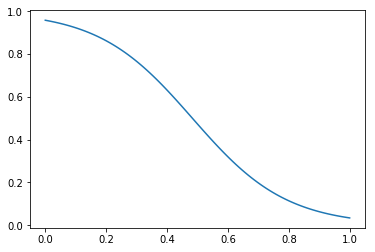

In [19]:
print_error(w, b)

The output is getting closer to our desired value. Continuing on in this fashion would train the neuron to better simulate the NOT function.

Note that we never explicitly specified the weights and bias. We simply use the errors to nudge them in the right direction. We will be seeing these again in the future.